In [1]:
!pip install seaborn
!pip3 install matplotlib==2.2.2

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 28})

In [3]:
kyoto_1_clickstream = pd.read_csv('dataset/data1_clickstream.csv', delimiter=',')
kyoto_1_clickstream['date'], kyoto_1_clickstream['time'] = kyoto_1_clickstream['eventtime'].str.split(' ', 1).str
kyoto_1_clickstream = kyoto_1_clickstream[['userid', 'date']]
#kyoto_1_clickstream

In [4]:
#kyoto_1_score[kyoto_1_score['userid'] == 'ds125'].groupby['date'].size()
plot_df = kyoto_1_clickstream.groupby(['userid', 'date']).size().reset_index(name='counts')
#plot_df

kyoto_engage = kyoto_1_clickstream.groupby(['date', 'userid']).size().reset_index(name='counts')
#kyoto_engage
#for user in set(kyoto_1_score.userid):
#    kyoto_1_score

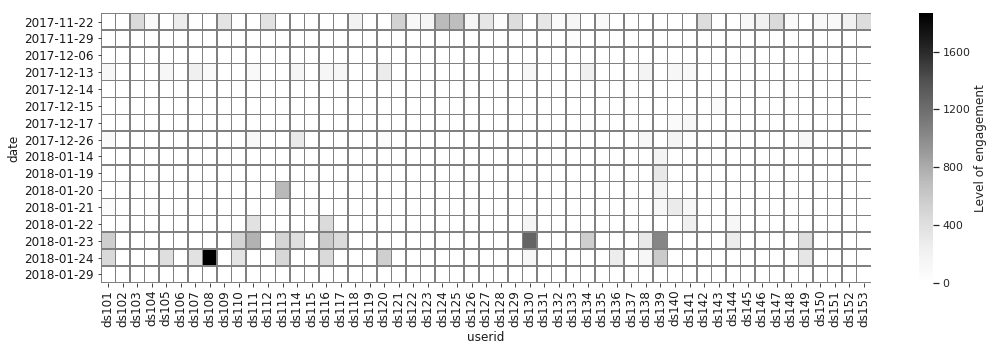

In [5]:
matplotlib.rcParams.update({'font.size': 12})
fig1, ax1 = plt.subplots(figsize=(15, 5))
#ax1.set_title('Students\' engagement of the week')

pivot = plot_df.pivot(index='userid', columns='date', values='counts')
pivot = pivot.fillna(0).T

sns.set()
ax1 = sns.heatmap(pivot, 
                  cbar_kws={'label': 'Level of engagement'}, 
                  cmap='Greys', 
                  linewidths=0.5, 
                  linecolor='gray')

sns.set(font_scale=0.9)

#plot_df['date'] = pd.to_datetime(plot_df['date'])
#ax1.set_yticklabels([i.strftime("%Y-%m-%d") for i in pivot.index], rotation=0)
ax1.set_yticklabels(pivot.index, rotation=0)
fig1.tight_layout()
fig1.savefig('./images/students_engagement_week.png', dpi=300)

In [6]:
kyoto_1_score = pd.read_csv('dataset/data1_score.csv')
kyoto_x_all = pd.merge(plot_df, kyoto_1_score, on='userid')

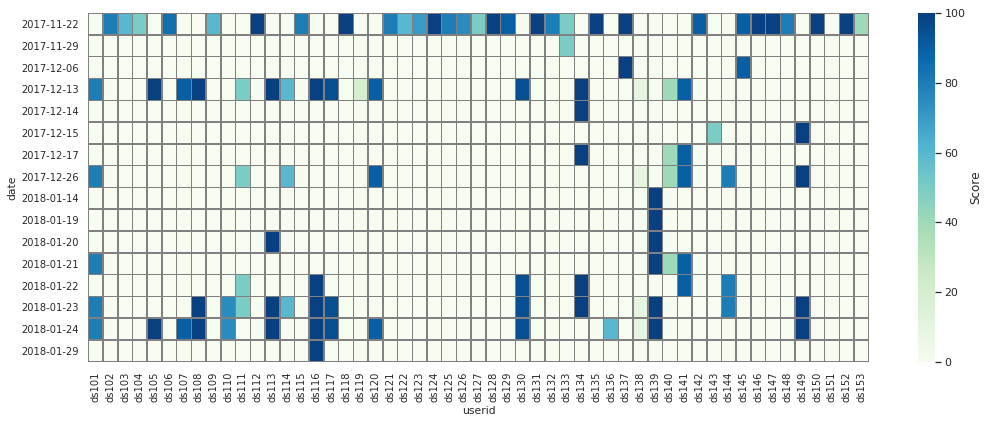

In [7]:

fig1, ax1 = plt.subplots(figsize=(15, 6))
#ax1.set_title('Students\' score versus learning activitits per week', fontsize=12)
pivot = kyoto_x_all.pivot(index='userid', columns='date', values='score')
#pivot = kyoto_x_all.pivot(index='userid', columns='date', values='score')
pivot = pivot.fillna(0).T
#pivot.reindex(set(kyoto_x_all['date'].dt.strftime('%Y-%m-%d')))

sns.set()
ax1 = sns.heatmap(pivot, 
                  cbar_kws={'label': 'Score'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray')

sns.set(font_scale=0.9)

#ax1.yaxis_date()
#plot_df['date'] = pd.to_datetime(kyoto_x_all['date'])
#ax1.set_xticklabels(kyoto_x_all['date'].dt.strftime('%Y-%m-%d'), rotation=-45, fontsize=12)
#ax1.set_yticklabels(set(kyoto_x_all['date'].dt.strftime('%Y-%m-%d')), fontsize=12)
ax1.set_yticklabels(pivot.index, rotation=0)
fig1.tight_layout()
fig1.savefig('./images/students_score_week.png', dpi=300)

In [8]:
sns.set(style='white')

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
    ax = plt.gca()
    print(x)
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def cor_matrix(df):
    g = sns.PairGrid(df, palette=['red'])
    
  # Use normal regplot as `lowess=True` doesn't provide CIs.
    g.map_upper(sns.regplot, scatter_kws={'s':10})
    g.map_diag(sns.distplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_lower(corrfunc)
    g.map_diag(annotate_colname)
  # Remove axis labels, as they're in the diagonals.
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return g

In [9]:
kyoto_1_x = pd.read_csv('dataset/dataset2_15features.csv')
kyoto_1_x = kyoto_1_x.drop(['Score'], axis=1)
kyoto_1_x.rename(index=str, columns={"Userid": "userid"}, inplace=True)
# kyoto_1_x = pd.merge(kyoto_1_x, kyoto_1_score, on='userid')
kyoto_1_x = kyoto_1_x.drop(['userid', 'Delete_Memo'], axis=1)
#print(list(kyoto_1_x))
#cor_matrix(kyoto_1_x[list(kyoto_1_x)[0:4]])

#kyoto_1_x.plot.scatter

<Figure size 1080x1080 with 0 Axes>

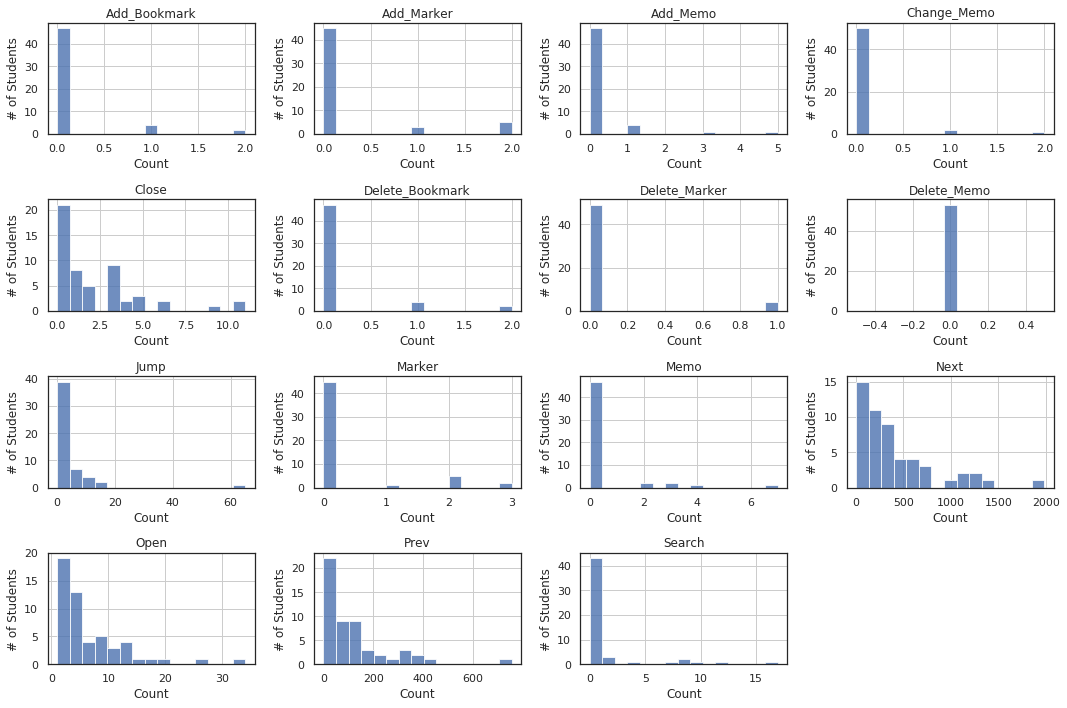

In [10]:

kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x = kyoto_1_x.drop(['Score','Userid'], axis=1)

plt.figure(figsize=(15, 15))
ax = kyoto_1_x.hist(alpha=0.8, bins=15, figsize=(15, 10))
#for x in ax:
#     x.set_title('x')

for array in ax:
    for subplot in array:
        subplot.set_ylabel('# of Students')
        subplot.set_xlabel('Count')

plt.tight_layout()
plt.savefig('./images/feature_dist.png', dpi=300)

In [11]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ff33e048>,
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

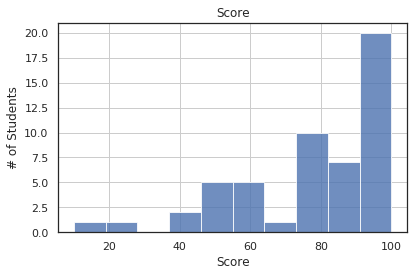

In [12]:
kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x = kyoto_1_x[kyoto_1_x['Score']>0]

plt.figure(figsize=(15, 15))
ax = kyoto_1_x.hist(column='Score', grid=True, alpha=0.8)
ax[0][0].set_ylabel('# of Students')
ax[0][0].set_xlabel('Score')
#ax[0][0].set_title('Score Distribution (Total Student = 52)')
#plt.legend(['Training'])

plt.tight_layout()
plt.savefig('./images/score_dist.png', dpi=300)

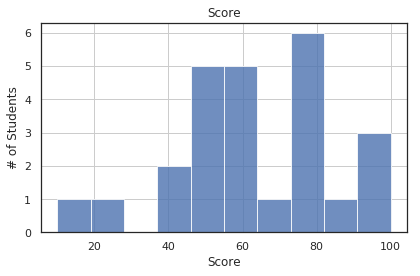

In [13]:
kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x = kyoto_1_x[kyoto_1_x['Score']>0]

low_df = kyoto_1_x[kyoto_1_x['Score']<80]
up_df = kyoto_1_x[kyoto_1_x['Score']>=80]
up_df = up_df.sample(len(up_df)//4)
kyoto_1 = pd.concat([up_df, low_df])
ax = kyoto_1.hist('Score', grid=True, alpha=0.8, edgecolor='white')
    
ax[0][0].set_ylabel('# of Students')
ax[0][0].set_xlabel('Score')
#ax[0][0].set_title('Resample Score')
    
plt.tight_layout()
plt.savefig('./images/score_resample.png', dpi=300)